
# <font color='#8E44AD'>Como rellenar el área entre 2 curvas con un color o con una escala de colores en MATPLOTLIB</font>

In [1]:
import numpy as np
import pandas as pd
import lasio

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
las = lasio.read(r"D:\Pablo\Python\working_files\Equinor\15_9-23.las")

well = las.df()
pd.set_option('display.max_columns', None)           # Muestra todas las columnas
well = well.reindex(sorted(well.columns), axis=1)    # Ordena las columnas alfabeticamente
well

,BS,CALI,DCAL,DEPTH_MD,DRHO,DTC,DTS,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,GR,NPHI,PEF,RDEP,RHOB,RMED,ROP,ROPA,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
110.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.342522,NaN,NaN,NaN
110.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.720444,NaN,NaN,NaN
110.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.098358,NaN,NaN,NaN
110.456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.476280,NaN,NaN,NaN
110.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.854202,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224.328,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.749815,39.958431,NaN,NaN,NaN
3224.480,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.458361,37.414505,NaN,NaN,NaN
3224.632,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.287321,34.870579,NaN,NaN,NaN


## <font color='#2F60EB'>FILL_BETWEENX</font>

In [3]:
def den_por_sand(bulk):
    return (2.65-bulk)/(2.65-1)    

def den_por_lime(bulk):
    return (2.71-bulk)/(2.71-1)    

well['DPHISS']= well[['RHOB']].apply(den_por_sand)
well['DPHILS']= well[['RHOB']].apply(den_por_lime)

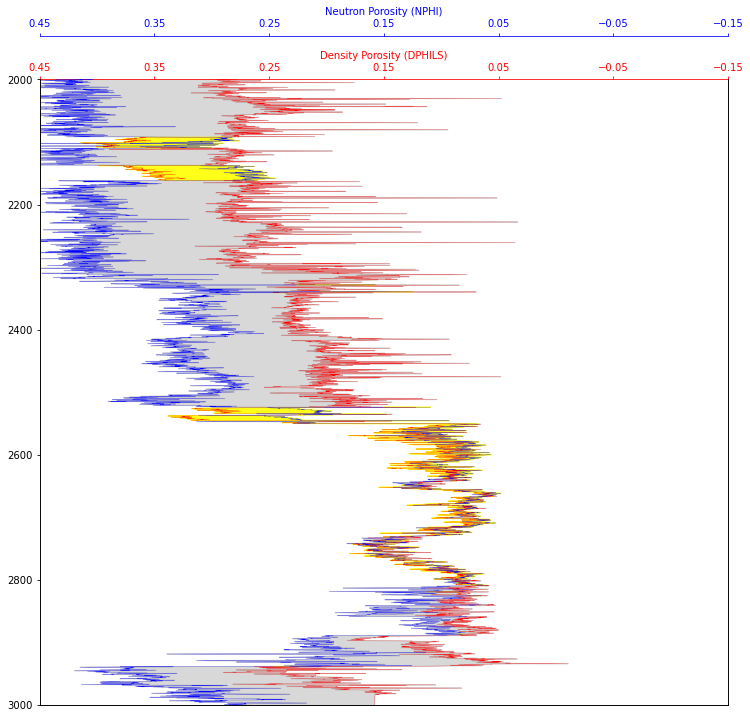

In [15]:
## TOP-BOT plot
top_plot = 2000 #las.well.STRT.value  # Valor default TOP del plot (modificar si es necesario)
bot_plot = 3000 #las.well.STOP.value  # Valor default BOTTOM del plot (modificar si es necesario)

crv_den_por = 'DPHILS'
crv_neu_por = 'NPHI'

por_izq = .45
por_der = -.15

################################### CODIGO ####################################

fig, ax = plt.subplots(figsize=(50,10))#Set up the plot axes

ax3 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1) 
ax31 = ax3.twiny()


###############################################################################
### DEN POROSITY ###

ax3.set_ylim(bot_plot, top_plot)
ax3.plot(well[crv_den_por], well.index, color = "red", linewidth = .2)
ax3.set_xlabel(f"Density Porosity ({well[crv_den_por].name})")
ax3.set_xlim(por_izq,por_der)
ax3.xaxis.label.set_color("red")
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.spines["top"].set_position(("axes", 1.))
ax3.tick_params(axis='x', colors="r")
ax3.set_xticks([0.45,0.35,0.25,0.15,0.05,-0.05,-0.15])
ax3.spines["top"].set_edgecolor("r")
################################################################################
### NEU POROSITY ###

ax31.plot(well[crv_neu_por], well.index, color = "blue", linewidth =.2)
ax31.set_xlabel(f"Neutron Porosity ({well[crv_neu_por].name})")
ax31.xaxis.label.set_color("b")
ax31.set_xlim(por_izq,por_der)
ax31.tick_params(axis='x', colors="blue")
ax31.spines["top"].set_position(("axes", 1.07))
ax31.spines["top"].set_visible(True)
ax31.set_xticks([0.45,0.35,0.25,0.15,0.05,-0.05,-0.15])
ax31.spines["top"].set_edgecolor("blue")
################################################################################

ax3.fill_betweenx(well.index, well[crv_neu_por], well[crv_den_por], where=well[crv_neu_por] > well[crv_den_por], interpolate = True, color="grey",alpha=0.3)
ax3.fill_betweenx(well.index, well[crv_neu_por], well[crv_den_por], where=well[crv_neu_por] < well[crv_den_por], interpolate = True, color="yellow",alpha=0.9)

plt.tight_layout()
plt.show()

## <font color='#2F60EB'>CMAP</font>

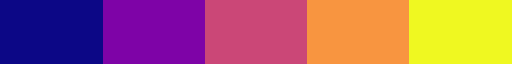

In [21]:
plt.get_cmap('plasma', 5)

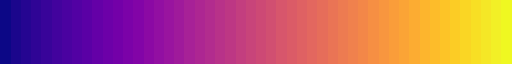

In [22]:
plt.get_cmap('plasma', 50)


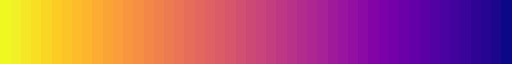

In [23]:
plt.get_cmap('plasma_r', 50)

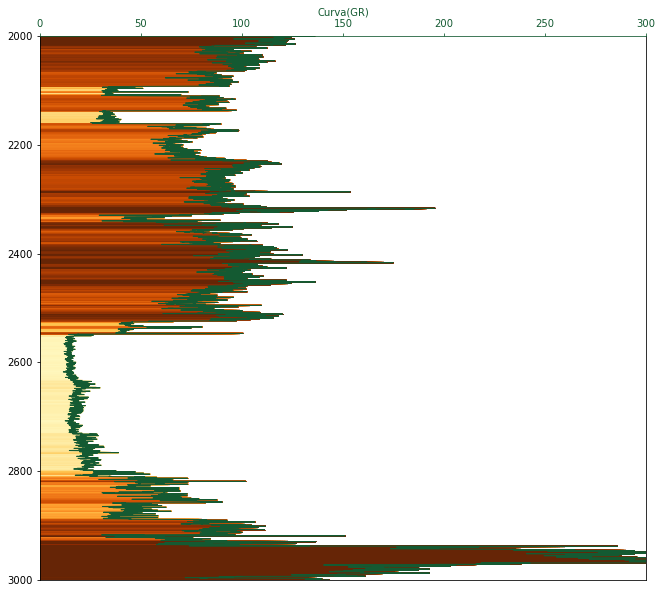

In [16]:
## TOP-BOT plot
top_plot = 2000 #las.well.STRT.value  # Valor default TOP del plot (modificar si es necesario)
bot_plot = 3000 #las.well.STOP.value  # Valor default BOTTOM del plot (modificar si es necesario)


### CURVA: nombre, escala y color
crv_1 = 'GR'             # nombre de la curva
crv_izq = 0              # Limite izquierdo curva
crv_der = 300            # Limite derecho curva
crv_color = '#145A32'    # Color de la curva en el plot


#### CMAP (mapa de colores) ###
crv_cmap_min = 0      # Valor mínimo color de la curva para el cmap (arena/caliza/clean)
crv_cmap_max = 120    # Valor máximo color de la curva para el cmap (arcilla/shale)

cmap_len = 100        # cantidad de elementos del cmap y cantidad de elementos 
                      # entre los valores mín-máx de la curva a la que le aplico el cmap.

cmap_name = 'YlOrBr'  # Nombre del cmap que voy a utilizar



########################################################################################################
##### CODIGO #####

cmap = plt.get_cmap(cmap_name, cmap_len)

cmap_crv = np.linspace(crv_cmap_min, crv_cmap_max, cmap_len)


##########  PLOT  ##########
fig, ax = plt.subplots(figsize=(50,10))#Set up the plot axes
   
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 

ax1.plot(well[crv_1], well.index, color = crv_color, linewidth = 1)
ax1.set_ylim(bot_plot, top_plot)
ax1.set_xlabel(f"Curva({crv_1})")
ax1.xaxis.label.set_color(crv_color)
ax1.set_xlim(crv_izq, crv_der)
ax1.tick_params(axis='x', colors=crv_color)
ax1.spines["top"].set_position(("axes", 1.0))
ax1.spines["top"].set_edgecolor(crv_color)
ax1.title.set_color(crv_color)
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")

## CMAP y FILL_BETWEEN
for item in cmap_crv:
    color = cmap(item/crv_cmap_max) 
    ax1.fill_betweenx(well.index, crv_izq , well[crv_1], where = well[crv_1] >= item,  color = color)

plt.show()

## <font color='#2F60EB'>FILL_BETWEENX + CMAP</font>

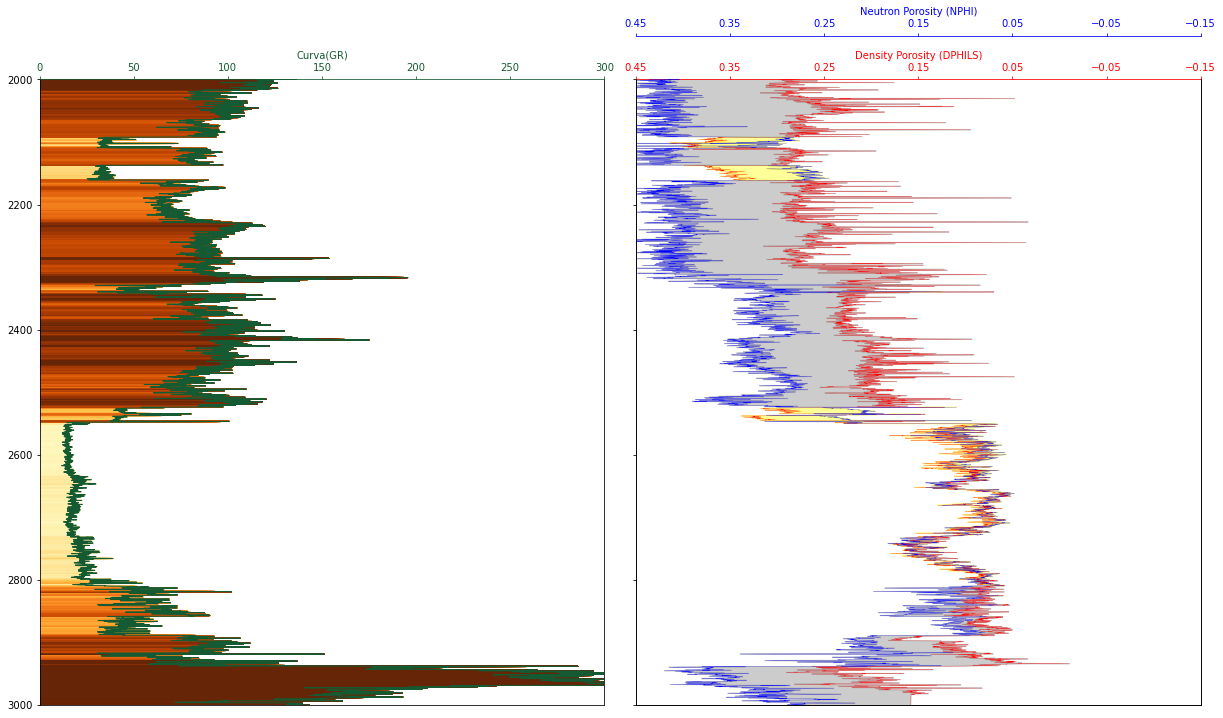

In [20]:
## TOP-BOT plot
top_plot = 2000 #las.well.STRT.value  # Valor default TOP del plot (modificar si es necesario)
bot_plot = 3000 #las.well.STOP.value  # Valor default BOTTOM del plot (modificar si es necesario)


########## CURVAS ##########
crv_1 = 'GR'             # nombre de la curva
crv_izq = 0              # Limite izquierdo curva
crv_der = 300            # Limite derecho curva
crv_color = '#145A32'    # Color de la curva en el plot

crv_den_por = 'DPHILS'
crv_neu_por = 'NPHI'
por_izq = .45
por_der = -.15


########## CMAP ##########
crv_cmap_min = 0         # Valor mínimo color de la curva para el cmap (arena/clean)
crv_cmap_max = 120       # Valor máximo color de la curva para el cmap (arcilla/shale)

cmap_len = 100           # cantidad de elementos del cmap y cantidad de elementos 
                         # entre los valores mín-máx de la curva a la que le aplico el cmap.

cmap_name = 'YlOrBr'     # Nombre del cmap que voy a utilizar


################################### CODIGO ####################################

cmap = plt.get_cmap(cmap_name, cmap_len)
cmap_crv = np.linspace(crv_cmap_min, crv_cmap_max, cmap_len)

########################### PLOT ###########################
fig, ax = plt.subplots(figsize=(50,10))#Set up the plot axes
   
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1) 
ax3 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1, sharey = ax1) 
ax31 = ax3.twiny()

############################################################
### GAMMA RAY ###

ax1.plot(well[crv_1], well.index, color = crv_color, linewidth = 1)
ax1.set_ylim(bot_plot, top_plot)
ax1.set_xlabel(f"Curva({crv_1})")
ax1.xaxis.label.set_color(crv_color)
ax1.set_xlim(crv_izq, crv_der)
ax1.tick_params(axis='x', colors=crv_color)
ax1.spines["top"].set_position(("axes", 1.0))
ax1.spines["top"].set_edgecolor(crv_color)
ax1.title.set_color(crv_color)
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")
    
############################################################
### DEN POROSITY ###

plt.setp(ax3.get_yticklabels(), visible = False)
ax3.plot(well[crv_den_por], well.index, color = "red", linewidth = .2)
ax3.set_xlabel(f"Density Porosity ({well[crv_den_por].name})")
ax3.set_xlim(por_izq,por_der)
ax3.xaxis.label.set_color("red")
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.spines["top"].set_position(("axes", 1.))
ax3.tick_params(axis='x', colors="r")
ax3.set_xticks([0.45,0.35,0.25,0.15,0.05,-0.05,-0.15])
ax3.spines["top"].set_edgecolor("r")

############################################################
### NEU POR ###

ax31.plot(well[crv_neu_por], well.index, color = "blue", linewidth =.2)
ax31.set_xlabel(f"Neutron Porosity ({well[crv_neu_por].name})")
ax31.xaxis.label.set_color("b")
ax31.set_xlim(por_izq,por_der)
ax31.tick_params(axis='x', colors="blue")
ax31.spines["top"].set_position(("axes", 1.07))
ax31.spines["top"].set_visible(True)
ax31.set_xticks([0.45,0.35,0.25,0.15,0.05,-0.05,-0.15])
ax31.spines["top"].set_edgecolor("blue")

############################################################
### FILL_BETWEENX y CMAP ###

ax3.fill_betweenx(well.index, well[crv_neu_por], well[crv_den_por], where=well[crv_neu_por] > well[crv_den_por], color="grey",alpha=0.4)
ax3.fill_betweenx(well.index, well[crv_neu_por], well[crv_den_por], where=well[crv_neu_por] < well[crv_den_por], color="yellow",alpha=0.4)

for item in cmap_crv:
    color = cmap(item/crv_cmap_max) 
    ax1.fill_betweenx(well.index, crv_izq , well[crv_1], where = well[crv_1] >= item,  color = color)
############################################################  

fig.subplots_adjust(wspace = 0.1)
plt.tight_layout()
plt.show()